### Лабораторная работа № 2:

> Реализовать вычисление гистограммы яркостей, среднего, дисперсии, энтропии, энергии (uniformity), коэффициентов асимметрии и эксцесса. Реализовать вычисление матрицы совместной встречаемости для пикселов отстоящих на r строк и с столбцов. Вычислить энергию матрицы совместной встречаемости.

<a href="file:///media/grigory/OS/MEPHI_SEM2/comp_vis/лекции/IP_Lecture_2.pdf"> Лекции</a>

In [1]:
%pylab inline
import cv2
import os

Populating the interactive namespace from numpy and matplotlib


In [273]:
from skimage import io

#C_s = (io.imread(os.path.join('..', 'images', 'lena.jpg'), as_grey=True)*255).astype('int')
C_s = (io.imread(os.path.join('..', 'images', 'cat1.jpg'), as_grey=True)*255).astype('int')
C_b = (io.imread(os.path.join('..', 'images', 'Arch2.JPG'), as_grey=True)*255).astype('int')

/home/grigory/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')
/home/grigory/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


In [274]:
def get_hist(img):
    return {i:sum(img==i) for i in range(img.max()+1) }

def get_probs(img):
    N = product(img.shape)
    img_hist = get_hist(img)
    return {i:(img_hist[i]/N) for i in img_hist.keys()}
    

hist_s = get_hist(C_s)
probs_s = get_probs(C_s)

In [276]:
# mean
def calc_mean(img):
    img_probs = get_probs(img)
    I = sum([i*img_probs[i] for i in range(img.max()+1)])
    return I

def calc_var(img):
    img_probs = get_probs(img)
    E = calc_mean(img)
    sigma2 = sum([((i-E)**2)*img_probs[i] for i in range(img.max()+1)])
    return sigma2

def calc_kurtosis(img):
    img_probs = get_probs(img)
    V = calc_var(img)
    E = calc_mean(img)
    kurt = (1/V**2) * sum([((i-E)**4)*img_probs[i] for i in range(img.max()+1)]) - 3
    return kurt

def calc_skewness(img):
    img_probs = get_probs(img)
    V = calc_var(img)
    E = calc_mean(img)
    kurt = (1/V**(3/2)) * sum([((i-E)**3)*img_probs[i] for i in range(img.max()+1)])
    return kurt

def calc_energy(img):
    img_probs = get_probs(img)
    energy = sum([img_probs[i]**2 for i in range(img.max()+1)])
    return energy

def calc_entropy(img):
    img_probs = get_probs(img)
    entropy = - sum([ img_probs[i] *  math.log(img_probs[i],2) for i in range(img.max()+1)])
    return entropy
    
    

#calc_kurtosis(C_s), calc_skewness(C_s), calc_energy(C_s), 
# calc_entropy(C_s)

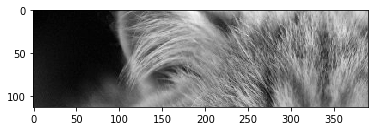

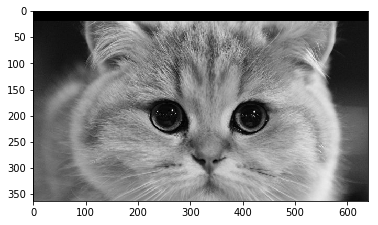

In [282]:
def shift_crop(img, d_r,d_c):
    h,w = img.shape
    res = np.zeros(shape=(h+d_r, w+d_c))
    old = ( slice(max(0, 0-d_r), min(h-d_r, h)), slice(max(0, 0-d_c), min(w-d_c, w)) )
    res = img[old]
    return(res)
def shift_img(img, d_r,d_c):
    res = np.zeros_like(img)
    h,w = img.shape
    new = ( slice(max(0, 0+d_r), min(h+d_r, h)), slice(max(0, 0+d_c), min(w+d_c, w)) )
    old = ( slice(max(0, 0-d_r), min(h-d_r, h)), slice(max(0, 0-d_c), min(w-d_c, w)) )
    res[new] = img[old]
    return(res)

plt.imshow(shift_crop(C_s, 250, 250), cmap='gray')
plt.show()
plt.imshow(shift_img(C_s, 20,1), cmap='gray');

In [299]:
from collections import Counter

def coocurence_matrix(img, d_r=1, d_c=0):
    shifted = shift_crop(img, -d_r, -d_c)
    pairs = list(zip(img.ravel(), shifted.ravel()))

    res = np.zeros(shape=(img.max()+1, 
                          img.max()+1))
    for (a,b), val in Counter(pairs).items():
        res[b,a] = val
    return(res)

# sanity check
d = np.array([[1,2,0,1,0],
              [3,2,1,0,0],
              [1,1,2,3,0],
              [3,3,3,1,0],
              [1,2,1,0,3]])
coocurence_matrix(d, 1,0)

array([[3., 2., 0., 0.],
       [1., 0., 1., 4.],
       [0., 1., 1., 1.],
       [2., 3., 1., 0.]])

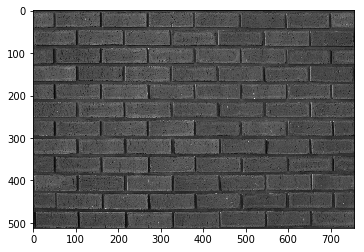

In [300]:
plt.imshow(C_b, cmap='gray')

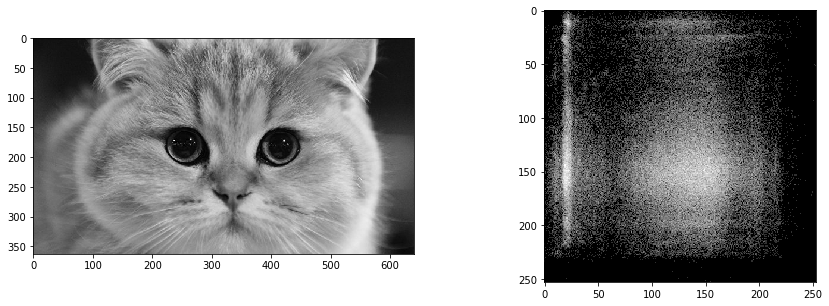

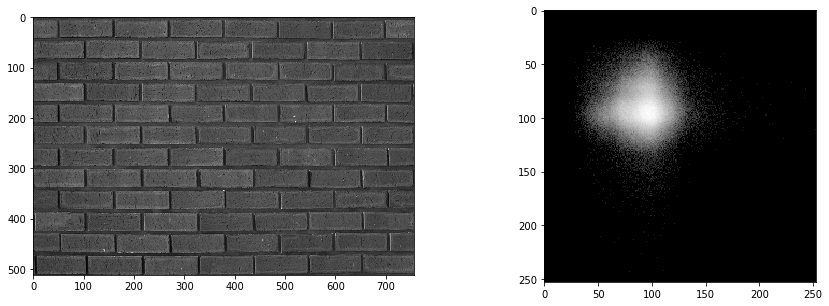

In [312]:
def preview_cooc(img):
    plt.subplots(1,2, figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    
    plt.subplot(1,2,2)
    img_cooc = coocurence_matrix(img, 100,100)
    img_cooc = np.log(img_cooc+1)
    img_cooc = img_cooc / img_cooc.max()
    plt.imshow(img_cooc, cmap='gray')
    
preview_cooc(C_s)
preview_cooc(C_b)

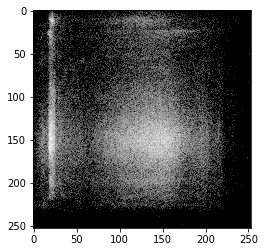

In [304]:
C_s_cooc = coocurence_matrix(C_s, 100,100)
C_s_cooc = np.log(C_s_cooc+1)
C_s_cooc = C_s_cooc / C_s_cooc.max()
plt.imshow(C_s_cooc, cmap='gray')